# MetaNovo: probabilistic database filtration for accurate MS/MS peptide identification 

Matthys Potgieter, Andrew J.M. Nel, David Tabb, Jonathan Blackburn, Nicola Mulder

In [8]:
import pandas as pd
import numpy as np
import os 
import shutil
import scipy.stats
import scikit_posthocs as ph
import numpy as np
import Bio
import scipy.stats
import scikit_posthocs as ph
import numpy as np
import matplotlib_venn
from matplotlib_venn import venn3, venn2
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.pyplot as plt
from pylab import *
from IPython.display import Image
import skbio

## 1. MetaPro-IQ comparison

In [2]:
cd /home/thys/metanovo

/home/thys/metanovo


### 1.1 Preprocessing

In [3]:
# MetaNovp
summary = pd.read_csv('metanovo_igc_txt/summary.txt',sep='\t')
summary[16:].stack()
#parameters = pd.read_csv('txt_metanovo/parameters.txt',sep='\t')
#pramaters

16  Raw file                                           Total
    MS                                                198071
    MS/MS                                             483091
    MS/MS Submitted                                   523851
    MS/MS Submitted (SIL)                             442331
    MS/MS Submitted (ISO)                                  0
    MS/MS Submitted (PEAK)                             81520
    MS/MS Identified                                  140784
    MS/MS Identified (SIL)                            136963
    MS/MS Identified (ISO)                                 0
    MS/MS Identified (PEAK)                             3821
    MS/MS Identified [%]                               26.87
    MS/MS Identified (SIL) [%]                         30.96
    MS/MS Identified (PEAK) [%]                         4.69
    Peptide Sequences Identified                       58473
    Peaks                                        2.05843e+07
    Isotope Patterns    

In [4]:
# MetaNovp
summary = pd.read_csv('metagenome_metanovo_txt/summary.txt',sep='\t')
summary[16:].stack()
#parameters = pd.read_csv('txt_metanovo/parameters.txt',sep='\t')
#pramaters

16  Raw file                                           Total
    MS                                                198071
    MS/MS                                             483091
    MS/MS Submitted                                   523851
    MS/MS Submitted (SIL)                             442331
    MS/MS Submitted (ISO)                                  0
    MS/MS Submitted (PEAK)                             81520
    MS/MS Identified                                  150135
    MS/MS Identified (SIL)                            145957
    MS/MS Identified (ISO)                                 0
    MS/MS Identified (PEAK)                             4178
    MS/MS Identified [%]                               28.66
    MS/MS Identified (SIL) [%]                            33
    MS/MS Identified (PEAK) [%]                         5.13
    Peptide Sequences Identified                       62930
    Peaks                                        2.05843e+07
    Isotope Patterns    

In [5]:
# MetaNovp
summary = pd.read_csv('txt_metanovo/summary.txt',sep='\t')
summary[16:].stack()
#parameters = pd.read_csv('txt_metanovo/parameters.txt',sep='\t')
#pramaters

16  Raw file                                           Total
    MS                                                198071
    MS/MS                                             483091
    MS/MS Submitted                                   523851
    MS/MS Submitted (SIL)                             442331
    MS/MS Submitted (ISO)                                  0
    MS/MS Submitted (PEAK)                             81520
    MS/MS Identified                                  190106
    MS/MS Identified (SIL)                            185213
    MS/MS Identified (ISO)                                 0
    MS/MS Identified (PEAK)                             4893
    MS/MS Identified [%]                               36.29
    MS/MS Identified (SIL) [%]                         41.87
    MS/MS Identified (PEAK) [%]                            6
    Peptide Sequences Identified                       69499
    Peaks                                        2.05843e+07
    Isotope Patterns    

In [6]:
# MetaNovp
summary = pd.read_csv('cns_reference_txt/summary.txt',sep='\t')
summary[32:].stack()

32  Raw file                                           Total
    MS                                                186376
    MS/MS                                             646329
    MS3                                                    0
    MS/MS Submitted                                   753677
    MS/MS Submitted (SIL)                             538979
    MS/MS Submitted (ISO)                                  0
    MS/MS Submitted (PEAK)                            214698
    MS/MS Identified                                  283256
    MS/MS Identified (SIL)                            273112
    MS/MS Identified (ISO)                                 0
    MS/MS Identified (PEAK)                            10144
    MS/MS Identified [%]                               37.58
    MS/MS Identified (SIL) [%]                         50.67
    MS/MS Identified (PEAK) [%]                         4.72
    Peptide Sequences Identified                       25250
    Peaks               

In [7]:
# MetaNovp
summary = pd.read_csv('cns_metanovo_txt/summary.txt',sep='\t')
summary[32:].stack()

32  Raw file                                           Total
    MS                                                186376
    MS/MS                                             646329
    MS3                                                    0
    MS/MS Submitted                                   753677
    MS/MS Submitted (SIL)                             538979
    MS/MS Submitted (ISO)                                  0
    MS/MS Submitted (PEAK)                            214698
    MS/MS Identified                                  280656
    MS/MS Identified (SIL)                            272094
    MS/MS Identified (ISO)                                 0
    MS/MS Identified (PEAK)                             8562
    MS/MS Identified [%]                               37.24
    MS/MS Identified (SIL) [%]                         50.48
    MS/MS Identified (PEAK) [%]                         3.99
    Peptide Sequences Identified                       23685
    Peaks               

In [8]:
folders = { 'metanovo - UniProt':'txt_metanovo',
            'metanovo - igc':'metanovo_igc_txt',
            'metanovo - metagenome':'metagenome_metanovo_txt',
            'metaproiq - igc' :'txt_workflow',
            'metaproiq - metagenome':'txt_matched_metagenome'}

order = ['metanovo - UniProt', 'metanovo - igc', 'metanovo - metagenome' , 'metaproiq - igc' , 'metaproiq - metagenome']
def process_txt(path, name):
    print('Analysis: {}'.format(name))
    result = {}
    peptides = pd.read_csv('{}/peptides.txt'.format(path),sep=None, engine='python')
    proteins = pd.read_csv('{}/proteinGroups.txt'.format(path),sep=None, engine='python')
    print('{}: Total peptides: '.format(name),len(peptides))
    target_peptides = peptides[peptides['Reverse']!= '+']
    reverse_peptides = peptides[peptides['Reverse'] == '+']
    print('{}: Total target peptides: '.format(name),len(target_peptides))
    print('{}: proteins: '.format(name),len(proteins))
    target_proteins = proteins[proteins['Reverse']!= '+']
    print('{}: Total target proteins: '.format(name),len(target_proteins))
    peptide_sequences = set(target_peptides['Sequence'].tolist())
    result['TargetPeptides'] = target_peptides
    result['ReversePeptides'] = reverse_peptides

    result['TargetProteins'] = target_proteins
    reverse_peptide_sequences = reverse_peptides['Sequence'].tolist()
    w = open('analysis/{}_peptide_list.txt'.format(name),'w')
    w.write('\n'.join(peptide_sequences))
    w.close()
    print()
    return result

results = {}
for name in order:
    path = folders[name]
    res = process_txt(path, name)
    results[name] = res
    #print(res.keys())
    

Analysis: metanovo - UniProt
metanovo - UniProt: Total peptides:  69499
metanovo - UniProt: Total target peptides:  69314
metanovo - UniProt: proteins:  15374
metanovo - UniProt: Total target proteins:  15204

Analysis: metanovo - igc
metanovo - igc: Total peptides:  58473
metanovo - igc: Total target peptides:  58307
metanovo - igc: proteins:  14004
metanovo - igc: Total target proteins:  13852

Analysis: metanovo - metagenome
metanovo - metagenome: Total peptides:  62930
metanovo - metagenome: Total target peptides:  62774
metanovo - metagenome: proteins:  13076
metanovo - metagenome: Total target proteins:  12933

Analysis: metaproiq - igc
metaproiq - igc: Total peptides:  69051
metaproiq - igc: Total target peptides:  68828
metaproiq - igc: proteins:  19742
metaproiq - igc: Total target proteins:  19533

Analysis: metaproiq - metagenome
metaproiq - metagenome: Total peptides:  71596
metaproiq - metagenome: Total target peptides:  71390
metaproiq - metagenome: proteins:  16956
metap

### 1.2 Peptide and Protein Identification Bar Charts

<Figure size 432x288 with 0 Axes>

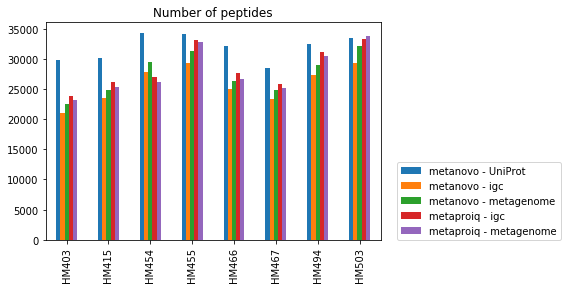

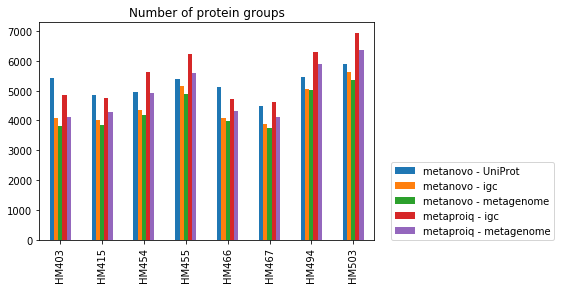

In [9]:

keys = list(results.keys())
plt.clf()
# Peptide counts per sample
count_df = pd.DataFrame()
for name in order:
    target_peptides = results[name]['TargetPeptides']
    for col in target_peptides.columns:
        if col.startswith('Experiment'):
            seqs = set(target_peptides[(target_peptides[col] > 0)]['Sequence'].tolist())
            count_df.loc[col.split()[1], name] = int(len(seqs))
ax1 = count_df.plot(kind='bar', rot=1)
ax1.set_title("Number of peptides")
ax1.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
fig = ax1.get_figure()
fig.savefig('analysis/peptide_id_bar.png', bbox_inches='tight')
plt.xticks(rotation=90)

plt.show()

# Protein counts per sample
prot_count = pd.DataFrame()
for name in order:
    target_proteins = results[name]['TargetProteins']
    for col in target_proteins.columns:
        if col.startswith('MS/MS Count '):
            ids = set(target_proteins[(target_proteins[col] > 0)]['id'].tolist())
            prot_count.loc[col.split()[-1], name] = int(len(ids))
ax2 = prot_count.plot(kind='bar', rot=1)
ax2.set_title("Number of protein groups")
ax2.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
fig = ax2.get_figure()
fig.savefig('analysis/protein_id_bar.png', bbox_inches='tight')
plt.xticks(rotation=90)

plt.show()

### 1.3 PEP Score boxplots

metanovo - UniProt exclusive:  11721
metanovo - igc exclusive:  1140
metanovo - metagenome exclusive:  1431
metaproiq - igc exclusive:  3371
metaproiq - metagenome exclusive:  3108


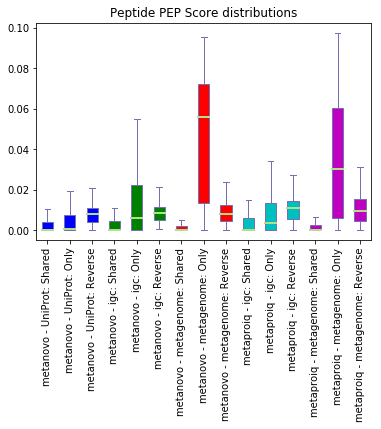

,Count,PEP Score - median,PEP Score - std. dev.
metanovo - UniProt: Shared,43935.0,0.000317,0.011542
metanovo - UniProt: Only,11721.0,0.000587,0.015497
metanovo - UniProt: Reverse,185.0,0.008128,0.012798
metanovo - igc: Shared,43935.0,0.000227,0.011965
metanovo - igc: Only,1140.0,0.005988,0.020804
metanovo - igc: Reverse,166.0,0.008545,0.013792
metanovo - metagenome: Shared,43935.0,0.000092,0.007958
metanovo - metagenome: Only,1431.0,0.055699,0.030068
metanovo - metagenome: Reverse,156.0,0.008336,0.014795
metaproiq - igc: Shared,43935.0,0.000374,0.013307


In [10]:
##################
## Peptide Sets ##
##################
all_peps = set()
keys = list(results.keys())
names = []
pep_scores = []
for key in order:
    peps = set(results[key]['TargetPeptides']['Sequence'])
    all_peps.update(peps)
# Get common peptides to all runs
intersect = all_peps.copy()
for key in order:
    peps = set(results[key]['TargetPeptides']['Sequence'])
    intersect = intersect & peps
# Get esclusive peptides for all runs
for key in order:
    peps = results[key]['TargetPeptides']
    rpeps = results[key]['ReversePeptides']
    exclusive = set(peps['Sequence'].tolist()).copy()
    for qkey in keys:
        if not qkey == key:
            qpeps = results[qkey]['TargetPeptides']
            qpeps = set(qpeps['Sequence'].tolist())
            exclusive -= qpeps
    print('{} exclusive: '.format(key), len(exclusive))
    common_pep = peps[peps['Sequence'].isin(intersect)]['PEP'].tolist()
    pep_scores.append(common_pep)
    names.append(key + ': Shared')
    exclusive_pep = peps[peps['Sequence'].isin(exclusive)]['PEP'].tolist()
    pep_scores.append(exclusive_pep)
    names.append(key + ': Only')
    reverse_pep = rpeps['PEP'].tolist()
    pep_scores.append(reverse_pep)
    names.append(key + ': Reverse')

#############
## BOXPLOT ##
#############

colours = ['b','g','r','c','m','y','k']
fig = plt.figure()
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(pep_scores, patch_artist=True, showfliers=False)
## change outline color, fill color and linewidth of the boxes
count = 0
col_ind=0
for box in bp['boxes']:
    count += 1
    # change outline color
    box.set( color='#7570b3', linewidth=1)
    # change fill color
    box.set( facecolor = colours[col_ind] )
    ## change color and linewidth of the whiskers
    if count % 3 == 0:
        col_ind +=1
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=1)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    #median.set(linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='.', color='#e7298a', alpha=0.5)
## Custom x-axis labels
ax.set_xticklabels(names, rotation=90)
#ax.set_yticklabels('Posterior Error Probability (PEP)') 
ax.set_title('Peptide PEP Score distributions')
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig.savefig('analysis/psm_pep_scores.png', bbox_inches='tight')
plt.show()
fig.clf()

pep_df = pd.DataFrame()
for val in range(len(names)):
    pep_df.loc[names[val], 'Count'] = len(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - median'] = np.median(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - std. dev.'] = np.std(pep_scores[val])

pep_df.to_csv('analysis/pep_scores.csv')
pep_df

### 1.4 PEP Score Kruskal-Wallis

In [11]:
def list_kw_dunn(names, data, value, group, path):
    colnames=names
    kw = scipy.stats.kruskal(*data)
    w = open(path + '/kw.txt', 'w')
    w.write(str(kw))
    print(kw)
    w.close()
    post_hoc = pd.DataFrame(ph.posthoc_dunn(data, p_adjust = 'fdr_bh'))
    post_hoc.index = names
    post_hoc.columns = names
    post_hoc.to_csv(path + '/dunn_bh.csv')
    return post_hoc
post_hoc = list_kw_dunn(names, pep_scores, "PEP", "Workflow", 'analysis')
post_hoc

KruskalResult(statistic=10970.00896076374, pvalue=0.0)


,metanovo - UniProt: Shared,metanovo - UniProt: Only,metanovo - UniProt: Reverse,metanovo - igc: Shared,metanovo - igc: Only,metanovo - igc: Reverse,metanovo - metagenome: Shared,metanovo - metagenome: Only,metanovo - metagenome: Reverse,metaproiq - igc: Shared,metaproiq - igc: Only,metaproiq - igc: Reverse,metaproiq - metagenome: Shared,metaproiq - metagenome: Only,metaproiq - metagenome: Reverse
metanovo - UniProt: Shared,-1.000000e+00,1.102800e-28,4.890456e-43,9.451782e-16,8.772737e-106,2.950138e-41,1.191468e-110,0.000000e+00,1.204878e-37,4.184950e-06,4.485773e-204,1.936716e-60,2.821370e-131,0.000000e+00,3.096671e-53
metanovo - UniProt: Only,1.102800e-28,-1.000000e+00,8.682648e-34,5.800463e-60,1.124741e-67,1.099382e-32,6.281693e-145,0.000000e+00,9.705045e-30,6.579490e-16,1.070251e-106,3.482174e-48,5.594967e-160,0.000000e+00,3.137613e-42
metanovo - UniProt: Reverse,4.890456e-43,8.682648e-34,-1.000000e+00,1.373593e-47,7.344546e-06,7.947080e-01,3.245894e-56,4.321973e-04,8.972055e-01,1.542926e-40,6.288850e-10,4.310458e-01,1.736458e-57,5.157058e-01,6.218762e-01
metanovo - igc: Shared,9.451782e-16,5.800463e-60,1.373593e-47,-1.000000e+00,8.971622e-124,1.831826e-45,2.714474e-46,0.000000e+00,1.548925e-41,6.245866e-37,1.431892e-246,2.136188e-66,9.696463e-60,0.000000e+00,1.519614e-58
metanovo - igc: Only,8.772737e-106,1.124741e-67,7.344546e-06,8.971622e-124,-1.000000e+00,3.048390e-06,3.239081e-159,6.505467e-58,1.434936e-05,4.546838e-96,1.447710e-03,1.287402e-09,1.522692e-164,4.050715e-33,4.130552e-08
metanovo - igc: Reverse,2.950138e-41,1.099382e-32,7.947080e-01,1.831826e-45,3.048390e-06,-1.000000e+00,1.961901e-53,3.161114e-03,8.914138e-01,6.318352e-39,3.345824e-10,6.490422e-01,1.288477e-54,7.947080e-01,8.215028e-01
metanovo - metagenome: Shared,1.191468e-110,6.281693e-145,3.245894e-56,2.714474e-46,3.239081e-159,1.961901e-53,-1.000000e+00,0.000000e+00,6.342757e-49,1.269069e-160,0.000000e+00,1.230338e-77,4.956855e-02,0.000000e+00,1.157829e-68
metanovo - metagenome: Only,0.000000e+00,0.000000e+00,4.321973e-04,0.000000e+00,6.505467e-58,3.161114e-03,0.000000e+00,-1.000000e+00,2.095754e-03,0.000000e+00,2.220873e-124,9.378333e-03,0.000000e+00,4.521443e-12,3.756698e-03
metanovo - metagenome: Reverse,1.204878e-37,9.705045e-30,8.972055e-01,1.548925e-41,1.434936e-05,8.914138e-01,6.342757e-49,2.095754e-03,-1.000000e+00,1.718862e-35,3.986676e-09,5.449775e-01,5.086384e-50,6.684439e-01,7.246193e-01
metaproiq - igc: Shared,4.184950e-06,6.579490e-16,1.542926e-40,6.245866e-37,4.546838e-96,6.318352e-39,1.269069e-160,0.000000e+00,1.718862e-35,-1.000000e+00,1.863469e-181,3.413651e-57,2.520613e-185,0.000000e+00,2.889944e-50


### 1.5 Venn Diagrams

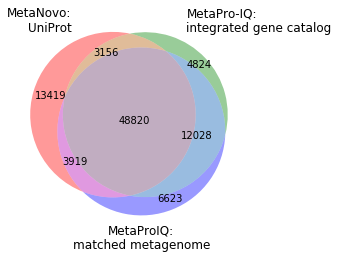

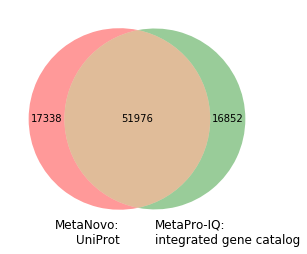

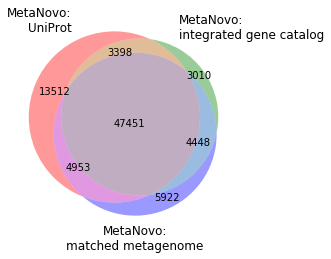

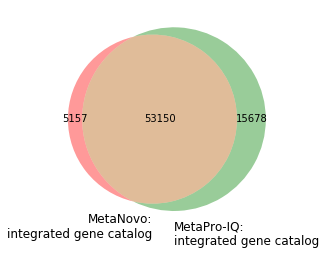

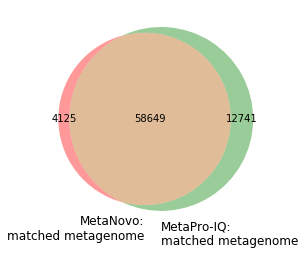

In [12]:


set1 = set(results['metanovo - UniProt']['TargetPeptides']['Sequence'])
set2 = set(results['metaproiq - igc']['TargetPeptides']['Sequence'])
set3 = set(results['metaproiq - metagenome']['TargetPeptides']['Sequence'])

#figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
fig = plt.figure()
venn3([set1, set2, set3], ('MetaNovo:\nUniProt', 'MetaPro-IQ:\nintegrated gene catalog', 'MetaProIQ:\nmatched metagenome'))
fig.savefig('analysis/mli_venn1.png', bbox_inches='tight')

plt.show()

#figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
fig = plt.figure()
venn2([set1, set2], ('MetaNovo:\nUniProt', 'MetaPro-IQ:\nintegrated gene catalog'))
fig.savefig('analysis/mli_venn2.png', bbox_inches='tight')

plt.show()


set1 = set(results['metanovo - UniProt']['TargetPeptides']['Sequence'])
set2 = set(results['metanovo - igc']['TargetPeptides']['Sequence'])
set3 = set(results['metanovo - metagenome']['TargetPeptides']['Sequence'])

fig = plt.figure()
venn3([set1, set2, set3], ('MetaNovo:\nUniProt', 'MetaNovo:\nintegrated gene catalog', 'MetaNovo:\nmatched metagenome'))
fig.savefig('analysis/mli_venn3.png', bbox_inches='tight')

#figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')


plt.show()

set1 = set(results['metanovo - igc']['TargetPeptides']['Sequence'])
set2 = set(results['metaproiq - igc']['TargetPeptides']['Sequence'])


#figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
fig = plt.figure()
venn2([set1, set2], ('MetaNovo:\nintegrated gene catalog', 'MetaPro-IQ:\nintegrated gene catalog'))
fig.savefig('analysis/mli_venn4.png', bbox_inches='tight')

plt.show()

set1 = set(results['metanovo - metagenome']['TargetPeptides']['Sequence'])
set2 = set(results['metaproiq - metagenome']['TargetPeptides']['Sequence'])


#figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
fig = plt.figure()
venn2([set1, set2], ('MetaNovo:\nmatched metagenome', 'MetaPro-IQ:\nmatched metagenome'))
fig.savefig('analysis/mli_venn5.png', bbox_inches='tight')

plt.show()

### 1.6 UniPept 

In [13]:
!unipept pept2lca AALTER MDGTEYIIVK

peptide,taxon_id,taxon_name,taxon_rank
AALTER,1,root,no rank
MDGTEYIIVK,186802,Clostridiales,order


In [14]:
print('All peptides found: ', len(all_peps))
w = open('analysis/combined_peptide_set.txt','w')
w.write('\n'.join(all_peps))
w.close()
cmd = 'cat analysis/combined_peptide_set.txt | prot2pept | peptfilter | sort -u | unipept pept2lca -e -a > analysis/combined_pept2lca.csv'
!{cmd}

All peptides found:  95614


In [15]:

taxa = pd.read_csv('analysis/combined_pept2lca.csv')
template = pd.DataFrame(pd.Series(list(all_peps)))
template.rename(columns={0:'peptide'}, inplace=True)
smapping = pd.merge(template, taxa, how='left')

/home/thys/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47,51,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


metanovo - UniProt 44
metanovo - igc 14
metanovo - metagenome 14
metaproiq - igc 14
metaproiq - metagenome 13
Total 44


<Figure size 432x288 with 0 Axes>

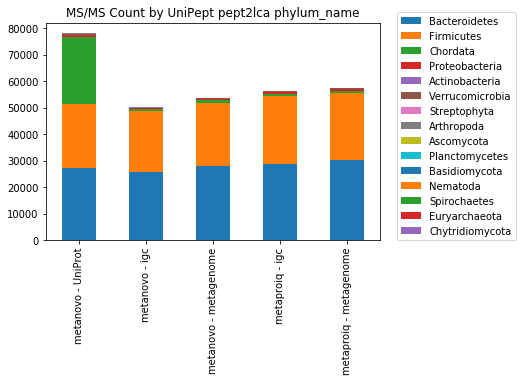

metanovo - UniProt 403
metanovo - igc 119
metanovo - metagenome 105
metaproiq - igc 121
metaproiq - metagenome 104
Total 403


<Figure size 432x288 with 0 Axes>

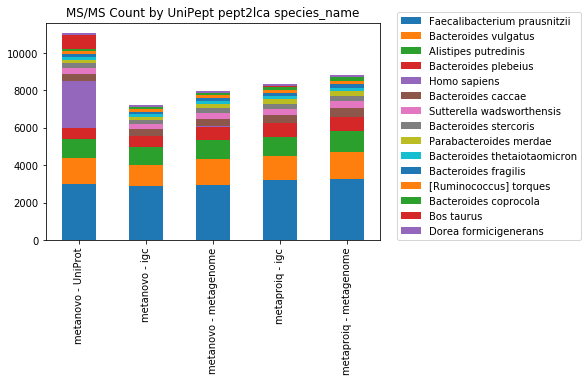

In [16]:

order = ['metanovo - UniProt', 'metanovo - igc', 'metanovo - metagenome' , 'metaproiq - igc' , 'metaproiq - metagenome']
def plot_taxa( results, col , mapping):
    keys = list(results.keys())
    plt.clf()
    # Peptide counts per sample
    count_df = pd.DataFrame()
    for name in order:
        target_peptides = results[name]['TargetPeptides']
        mapped = pd.merge(target_peptides, mapping, how='left', left_on='Sequence', right_on='peptide')
        #mapped = mapped.replace(np.nan, 'Uncharacterized')
        agg_cols = {'MS/MS Count': sum }
        agg = mapped.groupby(mapped[col]).agg(agg_cols)
        count_df[name] = agg['MS/MS Count']
    count_df = count_df.replace(np.nan, 0)
    count_df['Total'] = count_df.sum(axis=1)
    for column in count_df.columns:
        vals = count_df[count_df[column] > 0 ]
        print(column, len(vals))
        
    count_df = count_df.sort_values('Total',ascending=False)[:15]
    #print(count_df.head())
    del count_df['Total']
    t_df = count_df.transpose()    
    ax1 = t_df.plot(kind='bar', rot=1, stacked=True)
    ax1.set_title("MS/MS Count by UniPept pept2lca {}".format(col))
    ax1.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    plt.xticks(rotation=90)
    fig = ax1.get_figure()
    fig.savefig('analysis/{}_bar.png'.format(col), bbox_inches='tight')
    
    plt.show()
    #print(count_df)
    return count_df

count_df = plot_taxa(results, 'phylum_name', smapping)
#plot_taxa('family_name')
#count_df = plot_taxa('genus_name')
count_df = plot_taxa(results, 'species_name', smapping)

#count_df

MetaGenome


<Figure size 432x288 with 0 Axes>

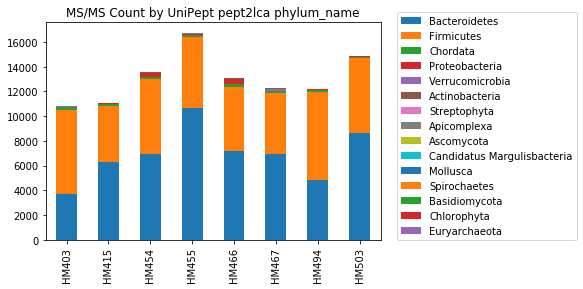

IGC


<Figure size 432x288 with 0 Axes>

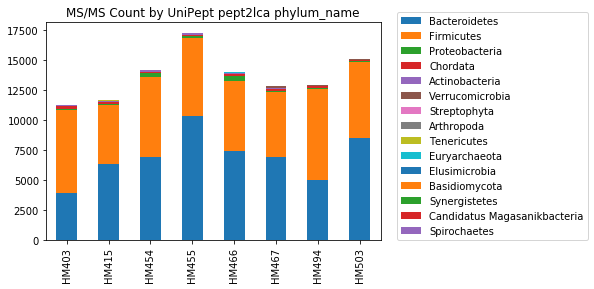

UniProt


<Figure size 432x288 with 0 Axes>

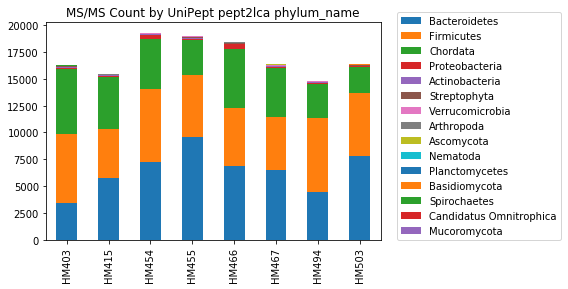

,HM403,HM415,HM454,HM455,HM466,HM467,HM494,HM503
phylum_name,,,,,,,,
Bacteroidetes,3417.0,5769.0,7203.0,9591.0,6843.0,6504.0,4466.0,7775.0
Firmicutes,6459.0,4543.0,6884.0,5810.0,5408.0,4975.0,6909.0,5864.0
Chordata,6066.0,4835.0,4632.0,3183.0,5565.0,4517.0,3165.0,2432.0
Proteobacteria,104.0,131.0,330.0,156.0,394.0,107.0,102.0,116.0
Actinobacteria,43.0,64.0,130.0,110.0,63.0,72.0,48.0,46.0
Streptophyta,79.0,41.0,40.0,90.0,47.0,38.0,33.0,38.0
Verrucomicrobia,15.0,17.0,17.0,26.0,35.0,106.0,33.0,20.0
Arthropoda,25.0,26.0,29.0,22.0,31.0,15.0,21.0,23.0
Ascomycota,9.0,12.0,13.0,12.0,18.0,13.0,6.0,10.0


In [17]:
def plot_taxa_runs( data_results, col , run, mapping):
    keys = list(data_results.keys())
    plt.clf()
    # Peptide counts per sample
    count_df = pd.DataFrame()
    target_peptides = data_results[run]['TargetPeptides']
    for c in target_peptides.columns:
            if c.startswith('Experiment '):
                seqs = target_peptides[[ 'Sequence' , c ]]
                #count_df.loc[col.split()[1], name] = int(len(seqs))
                mapped = pd.merge(seqs, mapping, how='left', left_on='Sequence', right_on='peptide')
                #mapped[col] = mapped[col].replace(np.nan, 'Uncharacterized')
                agg_cols = {c: sum }
                agg = mapped.groupby(mapped[col]).agg(agg_cols)
                agg[c] = agg[c]#/agg[c].sum() * 100
                count_df[c.split()[-1]] = agg[c]
    count_df = count_df.replace(np.nan, 0)
    count_df['Total'] = count_df.sum(axis=1)
    count_df = count_df.sort_values('Total',ascending=False)[:15]
    del count_df['Total']
    t_df = count_df.transpose()    
    ax1 = t_df.plot(kind='bar', rot=1, stacked=True)
    ax1.set_title("MS/MS Count by UniPept pept2lca {}".format(col))
    ax1.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig = ax1.get_figure()
    fig.savefig('analysis/{}_bar.png'.format(col), bbox_inches='tight')
    plt.xticks(rotation=90)
    plt.show()
    return count_df

print('MetaGenome')
plot_taxa_runs(results, 'phylum_name', 'metaproiq - metagenome', smapping )
print('IGC')
plot_taxa_runs(results, 'phylum_name', 'metaproiq - igc', smapping )
print('UniProt')
plot_taxa_runs(results, 'phylum_name', 'metanovo - UniProt' , smapping)

MetaGenome


<Figure size 432x288 with 0 Axes>

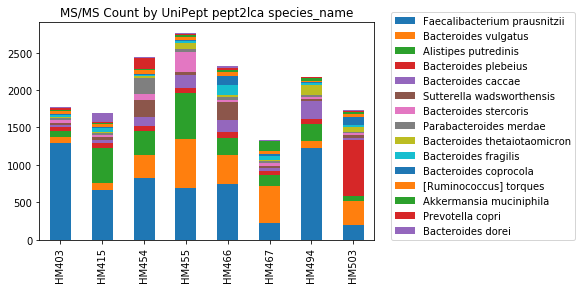

IGC


<Figure size 432x288 with 0 Axes>

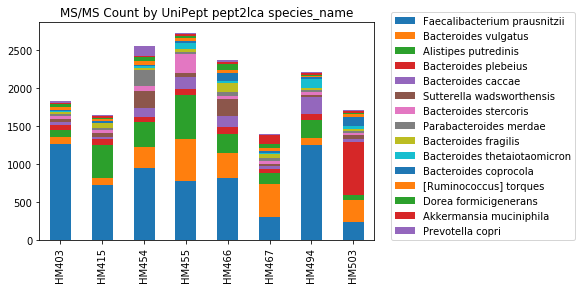

UniProt


<Figure size 432x288 with 0 Axes>

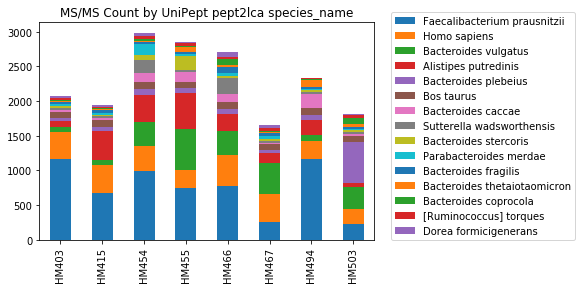

,HM403,HM415,HM454,HM455,HM466,HM467,HM494,HM503
species_name,,,,,,,,
Faecalibacterium prausnitzii,1161.0,678.0,989.0,746.0,776.0,254.0,1161.0,222.0
Homo sapiens,391.0,398.0,366.0,257.0,445.0,406.0,256.0,227.0
Bacteroides vulgatus,72.0,79.0,343.0,589.0,349.0,451.0,89.0,304.0
Alistipes putredinis,83.0,406.0,381.0,528.0,237.0,132.0,222.0,57.0
Bacteroides plebeius,52.0,59.0,88.0,65.0,71.0,50.0,70.0,594.0
Bos taurus,88.0,103.0,103.0,91.0,101.0,88.0,107.0,85.0
Bacteroides caccae,28.0,31.0,129.0,141.0,127.0,20.0,195.0,36.0
Sutterella wadsworthensis,28.0,25.0,191.0,29.0,219.0,28.0,25.0,29.0
Bacteroides stercoris,31.0,25.0,72.0,205.0,28.0,25.0,31.0,23.0


In [18]:
print('MetaGenome')
plot_taxa_runs(results, 'species_name', 'metaproiq - metagenome', smapping )
print('IGC')
plot_taxa_runs(results, 'species_name', 'metaproiq - igc' ,smapping)
print('UniProt')
plot_taxa_runs(results, 'species_name', 'metanovo - UniProt' , smapping)

## 2. Human CNS Validation

### 2.1 Preprocessing

In [61]:
parameters = pd.read_csv('cns_reference_txt/parameters.txt',sep='\t')
parameters['Parameter'].values

array(['Version', 'User name', 'Machine name', 'Date of writing',
       'Fixed modifications', 'Include contaminants', 'PSM FDR',
       'Protein FDR', 'Site FDR', 'Use Normalized Ratios For Occupancy',
       'Min. peptide Length', 'Min. score for unmodified peptides',
       'Min. score for modified peptides',
       'Min. delta score for unmodified peptides',
       'Min. delta score for modified peptides', 'Min. unique peptides',
       'Min. razor peptides', 'Min. peptides',
       'Use only unmodified peptides and',
       'Modifications included in protein quantification',
       'Peptides used for protein quantification',
       'Discard unmodified counterpart peptides',
       'Label min. ratio count', 'Use delta score', 'iBAQ',
       'iBAQ log fit', 'Match between runs', 'Matching time window [min]',
       'Alignment time window [min]', 'Find dependent peptides',
       'Fasta file', 'Decoy mode', 'Include contaminants',
       'Advanced ratios', 'Fixed andromeda index fol

In [19]:
# MetaNovp
summary = pd.read_csv('cns_reference_txt/summary.txt',sep='\t')
summary[16:].stack()
#parameters = pd.read_csv('txt_metanovo/parameters.txt',sep='\t')
#pramaters

16  Raw file                                              E1
    Peptide Sequences Identified                       10134
17  Raw file                                             E10
    Peptide Sequences Identified                       12796
18  Raw file                                             E11
    Peptide Sequences Identified                       12907
19  Raw file                                             E12
    Peptide Sequences Identified                       13731
20  Raw file                                             E13
    Peptide Sequences Identified                       13966
21  Raw file                                             E14
    Peptide Sequences Identified                       13614
22  Raw file                                             E15
    Peptide Sequences Identified                        9802
23  Raw file                                             E16
    Peptide Sequences Identified                        9800
24  Raw file            

In [20]:
# MetaNovp
summary = pd.read_csv('cns_metanovo_txt/summary.txt',sep='\t')
summary[16:].stack()
#parameters = pd.read_csv('txt_metanovo/parameters.txt',sep='\t')
#pramaters

16  Raw file                                              E1
    Peptide Sequences Identified                        9843
17  Raw file                                             E10
    Peptide Sequences Identified                       12572
18  Raw file                                             E11
    Peptide Sequences Identified                       12773
19  Raw file                                             E12
    Peptide Sequences Identified                       13342
20  Raw file                                             E13
    Peptide Sequences Identified                       13536
21  Raw file                                             E14
    Peptide Sequences Identified                       13318
22  Raw file                                             E15
    Peptide Sequences Identified                        9618
23  Raw file                                             E16
    Peptide Sequences Identified                        9622
24  Raw file            

In [21]:
folders = {'metanovo - UniProt':'cns_metanovo_txt',
           'Human Reference proteome':'cns_reference_txt'}

human_results = {}
order = list(folders.keys())
for name in folders:
    path = folders[name]
    res = process_txt(path, name)
    human_results[name] = res

Analysis: metanovo - UniProt
metanovo - UniProt: Total peptides:  23685
metanovo - UniProt: Total target peptides:  23639
metanovo - UniProt: proteins:  3741
metanovo - UniProt: Total target proteins:  3705

Analysis: Human Reference proteome
Human Reference proteome: Total peptides:  25250
Human Reference proteome: Total target peptides:  25199
Human Reference proteome: proteins:  3487
Human Reference proteome: Total target proteins:  3453



### 2.2 Peptide and protein identification bar charts

<Figure size 432x288 with 0 Axes>

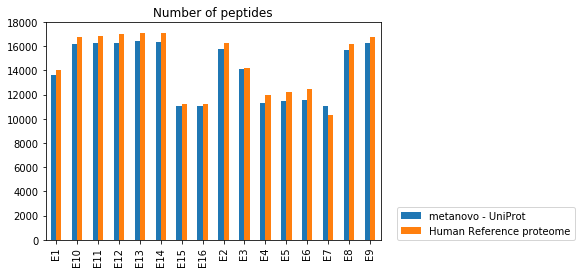

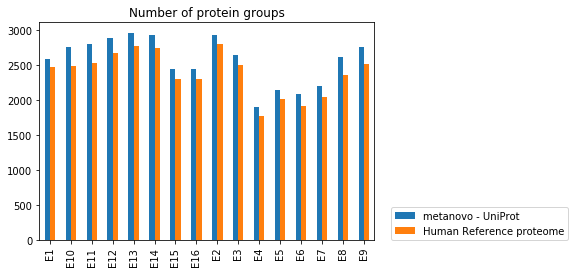

In [22]:

keys = list(human_results.keys())
plt.clf()
#figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# Peptide counts per sample
count_df = pd.DataFrame()
for name in keys:
    target_peptides = human_results[name]['TargetPeptides']
    for col in target_peptides.columns:
        if col.startswith('Experiment'):
            seqs = set(target_peptides[(target_peptides[col] > 0)]['Sequence'].tolist())
            count_df.loc[col.split()[1], name] = int(len(seqs))
ax1 = count_df.plot(kind='bar', rot=1)
ax1.set_title("Number of peptides")
ax1.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
fig = ax1.get_figure()

fig.savefig('analysis/peptide_id_bar_cns.png', bbox_inches='tight')
plt.xticks(rotation=90)

plt.show()

#figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
# Protein counts per sample
prot_count = pd.DataFrame()
for name in keys:
    target_proteins = human_results[name]['TargetProteins']
    for col in target_proteins.columns:
        if col.startswith('MS/MS count '):
            ids = set(target_proteins[(target_proteins[col] > 0)]['id'].tolist())
            prot_count.loc[col.split()[-1], name] = int(len(ids))
##prot_count['index'] = prot_count.index
#prot_count['index'] = prot_count['index'].apply(lambda x : int(x.split("E")[1]))
#prot_count = prot_count.sort_values('index')
#del prot_count['index']
ax2 = prot_count.plot(kind='bar', rot=1)
ax2.set_title("Number of protein groups")
ax2.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
fig = ax2.get_figure()
fig.savefig('analysis/protein_id_bar_cns.png', bbox_inches='tight')
plt.xticks(rotation=90)

plt.show()

### 2.3 Peptide identification VENN diagrams

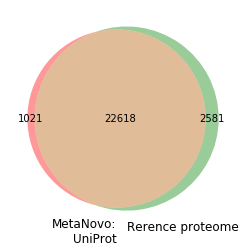

In [23]:
hset1 = set(human_results['metanovo - UniProt']['TargetPeptides']['Sequence'])
hset2 = set(human_results['Human Reference proteome']['TargetPeptides']['Sequence'])


fig = plt.figure()


venn2([hset1, hset2], ('MetaNovo:\nUniProt', 'Rerence proteome'))
fig.savefig('analysis/mli_venn_cns.png', bbox_inches='tight')
plt.show()

In [24]:
all_cns_peps = hset1.union(hset2)
print('All peptides found: ', len(all_cns_peps))
w = open('analysis/combined_cns_peptide_set.txt','w')
w.write('\n'.join(all_cns_peps))
w.close()
cmd = 'cat analysis/combined_cns_peptide_set.txt | prot2pept | peptfilter | sort -u | unipept pept2lca -e -a > analysis/combined_cns_pept2lca.csv'
!{cmd}



All peptides found:  26220


In [25]:
len(hset1 & hset2) / len(hset1 | hset2) * 100

86.26239511823036

In [26]:
human_results.keys()

dict_keys(['metanovo - UniProt', 'Human Reference proteome'])

In [27]:
htaxa = pd.read_csv('analysis/combined_cns_pept2lca.csv')
htemplate = pd.DataFrame(pd.Series(list(all_cns_peps)))
htemplate.rename(columns={0:'peptide'}, inplace=True)
hmapping = pd.merge(htemplate, htaxa, how='left')

/home/thys/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (11,43,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


metanovo - UniProt 35
Human Reference proteome 9
Total 35


<Figure size 432x288 with 0 Axes>

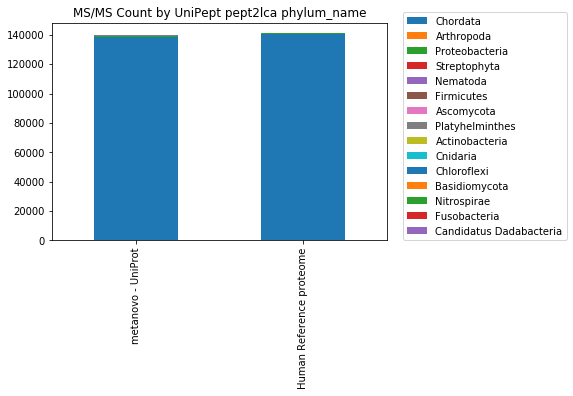

In [28]:
res = plot_taxa(human_results, 'phylum_name',  hmapping)

metanovo - UniProt 183
Human Reference proteome 38
Total 183


<Figure size 432x288 with 0 Axes>

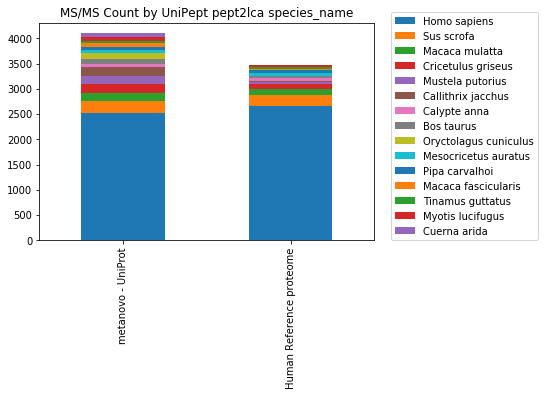

In [29]:
res = plot_taxa(human_results, 'species_name', hmapping)

UniProt


<Figure size 432x288 with 0 Axes>

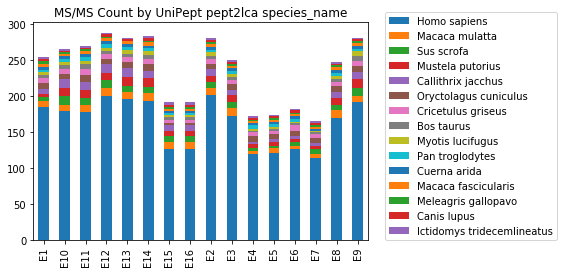

In [30]:
print('UniProt')
res = plot_taxa_runs(human_results, 'species_name', 'metanovo - UniProt', hmapping )

Reference proteome


<Figure size 432x288 with 0 Axes>

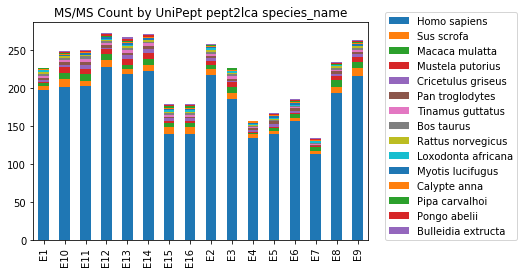

In [31]:
print('Reference proteome')
res = plot_taxa_runs(human_results, 'species_name', 'Human Reference proteome', hmapping )

### 2.4 PEP Score analysis

In [32]:
from Bio import SeqIO
human_reference = list(SeqIO.parse("cns_reference_txt/uniprot-proteome%3AUP000005640.fasta","fasta"))
seqs = '*'.join([str(i.seq) for i in human_reference])

In [33]:
import scipy.stats
import scikit_posthocs as ph
import numpy as np
import Bio

##################
## Peptide Sets ##
##################

all_human_peps = set()
all_non_human_peps = set()

keys = list(human_results.keys())
names = []
pep_scores = []
for key in keys:
    print(key)
    peps = set(human_results[key]['TargetPeptides']['Sequence'])
    for pep in peps:
        if pep in seqs:
            all_human_peps.add(pep)
        else:
            all_non_human_peps.add(pep)

metanovo - UniProt
Human Reference proteome


In [34]:
contaminants = human_results['metanovo - UniProt']['TargetPeptides']
contaminants = set(contaminants[contaminants['Potential contaminant'] == '+']['Sequence'].tolist())

In [35]:
all_non_human_peps

temp = human_results['metanovo - UniProt']['TargetPeptides']
variants = temp[temp['Sequence'].isin(all_non_human_peps)]
print(len(variants))
variants = variants[variants['Potential contaminant'] != '+']


649


metanovo - UniProt Human:  22941
metanovo - UniProt Non-human:  618
Human Reference proteome Human:  25126
Human Reference proteome Non-human:  0


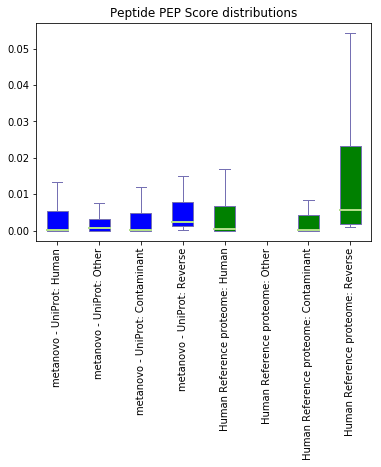

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Count,PEP Score - median,PEP Score - std. dev.
metanovo - UniProt: Human,22941.0,0.000194,0.016802
metanovo - UniProt: Other,618.0,0.000788,0.070353
metanovo - UniProt: Contaminant,80.0,0.000102,0.012394
metanovo - UniProt: Reverse,46.0,0.002332,0.017230
Human Reference proteome: Human,25126.0,0.000349,0.019485
Human Reference proteome: Other,0.0,NaN,NaN
Human Reference proteome: Contaminant,73.0,0.000135,0.012398
Human Reference proteome: Reverse,51.0,0.005569,0.023853


In [36]:
pep_scores = []
names = []
for key in keys:
    peps = human_results[key]['TargetPeptides']
    cpeps = peps[peps['Potential contaminant']=='+']
    peps = peps[peps['Potential contaminant'] != '+']
    #peps = peps[peps['PEP'] < 1]
    rpeps = human_results[key]['ReversePeptides']
    key_peps = set(peps['Sequence'].tolist()).copy()
    non_human= set(key_peps)
    human = set(key_peps)
    for qkey in keys:
        if not qkey == key:
            non_human -= all_human_peps
            human -= all_non_human_peps
            
    print('{} Human: '.format(key), len(human))
    print('{} Non-human: '.format(key), len(non_human))
        
    human_pep = peps[peps['Sequence'].isin(human)]['PEP'].tolist()
    pep_scores.append(human_pep)
    names.append(key + ': Human')
    
    non_human_pep = peps[peps['Sequence'].isin(non_human)]['PEP'].tolist()
    pep_scores.append(non_human_pep)
    names.append(key + ': Other')
    
    contaminant_pep = cpeps['PEP'].tolist()
    pep_scores.append(contaminant_pep)
    names.append(key + ': Contaminant' )
    
    reverse_pep = rpeps['PEP'].tolist()
    pep_scores.append(reverse_pep)
    names.append(key + ': Reverse')

#############
## BOXPLOT ##
#############

colours = ['b','g','r','c','m','y','k']
fig = plt.figure()
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(pep_scores, patch_artist=True, showfliers=False)
## change outline color, fill color and linewidth of the boxes
count = 0
col_ind=0
for box in bp['boxes']:
    count += 1
    # change outline color
    box.set( color='#7570b3', linewidth=1)
    # change fill color
    box.set( facecolor = colours[col_ind] )
    ## change color and linewidth of the whiskers
    if count % 4 == 0:
        col_ind +=1
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=1)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    #median.set(linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='.', color='#e7298a', alpha=0.5)
## Custom x-axis labels
ax.set_xticklabels(names, rotation=90)
#ax.set_yticklabels('Posterior Error Probability (PEP)') 
ax.set_title('Peptide PEP Score distributions')
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig.savefig('analysis/psm_pep_scores_cns.png', bbox_inches='tight')
plt.show()
fig.clf()

pep_df = pd.DataFrame()
for val in range(len(names)):
    pep_df.loc[names[val], 'Count'] = len(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - median'] = np.median(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - std. dev.'] = np.std(pep_scores[val])

pep_df.to_csv('analysis/cns_pep_scores.csv')
pep_df

In [37]:
##post_hoc = list_kw_dunn(names, pep_scores, "PEP", "Workflow", 'analysis')
#post_hoc

In [38]:
species_mapping = hmapping[hmapping['taxon_rank']=='species']
primate_peptides = set(hmapping[hmapping['order_name']=='Primates']['peptide'].tolist())
primate_non_human = primate_peptides & all_non_human_peps 
print(len(primate_non_human - contaminants))

29


### 2.5 Genome annotation refinement by orthologous peptide identification

metanovo - UniProt Human:  23559
metanovo - UniProt Non-human primates:  23559


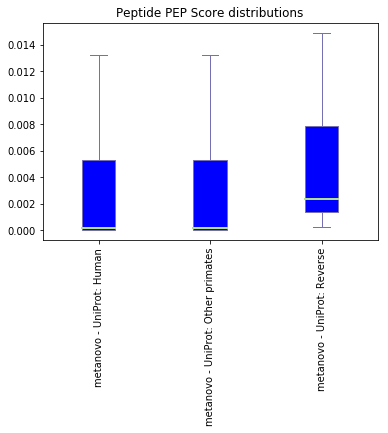

,Count,PEP Score - median,PEP Score - std. dev.
metanovo - UniProt: Human,23559.0,0.000204,0.020124
metanovo - UniProt: Other primates,23559.0,0.000204,0.020124
metanovo - UniProt: Reverse,46.0,0.002332,0.017230


In [51]:
pep_scores = []
names = []

for key in keys:
    peps = human_results[key]['TargetPeptides']
    peps = peps[peps['Potential contaminant'] != '+']
    #peps = peps[peps['PEP'] < 1]
    rpeps = human_results[key]['ReversePeptides']
    key_peps = set(peps['Sequence'].tolist()).copy()
    non_human= set(key_peps)
    human = set(key_peps)
    for qkey in keys:
        if not qkey == key:
            non_human = human & primate_non_human
            human -= all_non_human_peps
    print('{} Human: '.format(key), len(human))
    print('{} Non-human primates: '.format(key), len(non_human))
    human_pep = peps[peps['Sequence'].isin(human)]['PEP'].tolist()
    pep_scores.append(human_pep)
    names.append(key + ': Human')
    non_human_pep = peps[peps['Sequence'].isin(non_human)]['PEP'].tolist()
    pep_scores.append(non_human_pep)
    names.append(key + ': Other primates')
    reverse_pep = rpeps['PEP'].tolist()
    pep_scores.append(reverse_pep)
    names.append(key + ': Reverse')

#############
## BOXPLOT ##
#############

colours = ['b','g','r','c','m','y','k']
fig = plt.figure()
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(pep_scores, patch_artist=True, showfliers=False)
## change outline color, fill color and linewidth of the boxes
count = 0
col_ind=0
for box in bp['boxes']:
    count += 1
    # change outline color
    box.set( color='#7570b3', linewidth=1)
    # change fill color
    box.set( facecolor = colours[col_ind] )
    ## change color and linewidth of the whiskers
    if count % 3 == 0:
        col_ind +=1
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=1)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    #median.set(linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='.', color='#e7298a', alpha=0.5)
## Custom x-axis labels
ax.set_xticklabels(names, rotation=90)
#ax.set_yticklabels('Posterior Error Probability (PEP)') 
ax.set_title('Peptide PEP Score distributions')
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig.savefig('analysis/psm_pep_scores_cns_primate.png', bbox_inches='tight')
plt.show()
fig.clf()

pep_df = pd.DataFrame()
for val in range(len(names)):
    pep_df.loc[names[val], 'Count'] = len(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - median'] = np.median(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - std. dev.'] = np.std(pep_scores[val])

pep_df.to_csv('analysis/cns_primate_pep_scores.csv')
pep_df

In [50]:
print(names)
post_hoc = list_kw_dunn([names[0], 
                       
                         names[2], 
                         names[3], 
                         names[4],
                         names[5]], 
                        [pep_scores[0], 
                      
                         pep_scores[2], 
                         pep_scores[3], 
                         pep_scores[4],
                         pep_scores[5]], "PEP", "Workflow", 'analysis')
post_hoc

['metanovo - UniProt: Human', 'metanovo - UniProt: Other', 'metanovo - UniProt: Contaminant', 'metanovo - UniProt: Reverse']


IndexError: list index out of range

## 3. Adult stool

In [41]:
# MetaNovp
summary = pd.read_csv('metanovo_stool/stool_analysis_txt/txt/summary.txt',sep='\t')
summary[16:].stack()
#parameters = pd.read_csv('txt_metanovo/parameters.txt',sep='\t')
#pramaters

16  Raw file                                          FASP_A
    Peptide Sequences Identified                        7450
17  Raw file                                         FASP_AE
    Peptide Sequences Identified                        9306
18  Raw file                                          FASP_B
    Peptide Sequences Identified                        5058
19  Raw file                                         FASP_BE
    Peptide Sequences Identified                        9471
20  Raw file                                          FASP_C
    Peptide Sequences Identified                        4213
21  Raw file                                         FASP_CE
    Peptide Sequences Identified                        7128
22  Raw file                                          FASP_D
    Peptide Sequences Identified                        4613
23  Raw file                                         FASP_DE
    Peptide Sequences Identified                        8829
24  Raw file            

{'Afrotheria',
 'Atherinomorphae',
 'Batrachia',
 'Characiphysae',
 'Cypriniphysae',
 'Euarchontoglires',
 'Laurasiatheria',
 'Lepidosauria',
 'Neognathae',
 'Octopodiformes',
 'Palaeognathae',
 'Parasitiformes',
 'Podoplea',
 nan}

In [42]:
folders = {'metanovo - UniProt':'metanovo_stool/stool_analysis_txt/txt'}

stool_results = {}
order = list(folders.keys())
for name in folders:
    path = folders[name]
    res = process_txt(path, name)
    stool_results[name] = res

Analysis: metanovo - UniProt
metanovo - UniProt: Total peptides:  29943
metanovo - UniProt: Total target peptides:  29874
metanovo - UniProt: proteins:  6452
metanovo - UniProt: Total target proteins:  6385



In [43]:
cat metanovo_stool/stool_analysis_txt/txt/analysis/peptides/contaminant_peptides_list.txt | wc -l

253


In [44]:
cat metanovo_stool/stool_analysis_txt/txt/analysis/peptides/target_peptides_list.txt | wc -l

29873


In [45]:
ls metanovo_stool/stool_analysis_txt/txt/analysis/peptides

contaminant_peptides_list.txt    reverse_peptides_list.txt
non_reference_peptides_list.txt  target_peptides_list.txt
reference_peptides_list.txt      target_peptides.txt


In [46]:
cat metanovo_stool/stool_analysis_txt/txt/analysis/peptides/reference_peptides_list.txt | wc -l

2558


In [47]:
##################
## Peptide Sets ##
##################

all_human_peps = set()
all_non_human_peps = set()

keys = list(stool_results.keys())
names = []
pep_scores = []
for key in keys:
    print(key)
    peps = set(stool_results[key]['TargetPeptides']['Sequence'])
    for pep in peps:
        if pep in seqs:
            all_human_peps.add(pep)
        else:
            all_non_human_peps.add(pep)

metanovo - UniProt


metanovo - UniProt Human:  2559
metanovo - UniProt Non-human:  27061


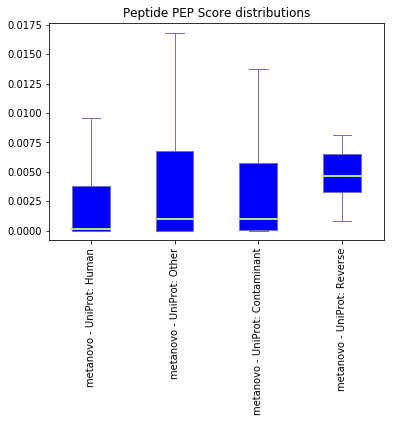

,Count,PEP Score - median,PEP Score - std. dev.
metanovo - UniProt: Human,2559.0,0.000158,0.011650
metanovo - UniProt: Other,27061.0,0.000949,0.017429
metanovo - UniProt: Contaminant,254.0,0.001017,0.011370
metanovo - UniProt: Reverse,69.0,0.004650,0.008234


In [48]:
pep_scores = []
names = []
keys = list(stool_results.keys())
for key in keys:
    peps = stool_results[key]['TargetPeptides']
    cpeps = peps[peps['Potential contaminant']=='+']
    peps = peps[peps['Potential contaminant'] != '+']
    #peps = peps[peps['PEP'] < 1]
    rpeps = stool_results[key]['ReversePeptides']
    key_peps = set(peps['Sequence'].tolist()).copy()
    non_human= set(key_peps)
    human = set(key_peps)
    #for qkey in keys:
    #|    if not qkey == key:
    non_human -= all_human_peps
    human -= all_non_human_peps
            
    print('{} Human: '.format(key), len(human))
    print('{} Non-human: '.format(key), len(non_human))
        
    human_pep = peps[peps['Sequence'].isin(human)]['PEP'].tolist()
    pep_scores.append(human_pep)
    names.append(key + ': Human')
    
    non_human_pep = peps[peps['Sequence'].isin(non_human)]['PEP'].tolist()
    pep_scores.append(non_human_pep)
    names.append(key + ': Other')
    
    contaminant_pep = cpeps['PEP'].tolist()
    pep_scores.append(contaminant_pep)
    names.append(key + ': Contaminant' )
    
    reverse_pep = rpeps['PEP'].tolist()
    pep_scores.append(reverse_pep)
    names.append(key + ': Reverse')

#############
## BOXPLOT ##
#############

colours = ['b','g','r','c','m','y','k']
fig = plt.figure()
ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(pep_scores, patch_artist=True, showfliers=False)
## change outline color, fill color and linewidth of the boxes
count = 0
col_ind=0
for box in bp['boxes']:
    count += 1
    # change outline color
    box.set( color='#7570b3', linewidth=1)
    # change fill color
    box.set( facecolor = colours[col_ind] )
    ## change color and linewidth of the whiskers
    if count % 4 == 0:
        col_ind +=1
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=1)
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=1)
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    #median.set(linewidth=2)
## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='.', color='#e7298a', alpha=0.5)
## Custom x-axis labels
ax.set_xticklabels(names, rotation=90)
#ax.set_yticklabels('Posterior Error Probability (PEP)') 
ax.set_title('Peptide PEP Score distributions')
## Remove top axes and right axes ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
fig.savefig('analysis/psm_pep_scores_stool.png', bbox_inches='tight')
plt.show()
fig.clf()

pep_df = pd.DataFrame()
for val in range(len(names)):
    pep_df.loc[names[val], 'Count'] = len(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - median'] = np.median(pep_scores[val])
    pep_df.loc[names[val], 'PEP Score - std. dev.'] = np.std(pep_scores[val])

pep_df.to_csv('analysis/stool_pep_scores.csv')
pep_df

In [49]:
post_hoc = list_kw_dunn(names, pep_scores, "PEP", "Workflow", 'analysis')
post_hoc

KruskalResult(statistic=261.7432734591897, pvalue=1.8866788880406473e-56)


,metanovo - UniProt: Human,metanovo - UniProt: Other,metanovo - UniProt: Contaminant,metanovo - UniProt: Reverse
metanovo - UniProt: Human,-1.000000e+00,7.074290e-51,0.000002,3.375956e-15
metanovo - UniProt: Other,7.074290e-51,-1.000000e+00,0.994544,6.978041e-08
metanovo - UniProt: Contaminant,2.475835e-06,9.945444e-01,-1.000000,1.437990e-06
metanovo - UniProt: Reverse,3.375956e-15,6.978041e-08,0.000001,-1.000000e+00


## Peptide and protein identifications

In [2]:
stool_analysis_folder='/home/thys/bio/export_stool3/txt/analysis_gregg'

In [3]:
target_peps = open(stool_analysis_folder + '/peptides/target_peptides_list.txt').readlines()
print('Number of target peptides: {}'.format(len(target_peps)))

cont_peps = open(stool_analysis_folder + '/peptides/contaminant_peptides_list.txt').readlines()
print('Number of contaminant peptides: {}'.format(len(cont_peps)))

rev_peps = open(stool_analysis_folder + '/peptides/reverse_peptides_list.txt').readlines()
print('Number of reverse peptides: {}'.format(len(rev_peps)))

ref_peps = open(stool_analysis_folder + '/peptides/reference_peptides_list.txt').readlines()
print('Number of reference peptides: {}'.format(len(ref_peps)))

nref_peps = open(stool_analysis_folder + '/peptides/non_reference_peptides_list.txt').readlines()
print('Number of non-reference peptides: {}'.format(len(nref_peps)))

print()
w = open(stool_analysis_folder +'/summary.txt').read()
print(w)

Number of target peptides: 31163
Number of contaminant peptides: 260
Number of reverse peptides: 82
Number of reference peptides: 2628
Number of non-reference peptides: 28275

Target proteingroups: 6961
Target peptides: 31163
Target msms: 191716
27  Raw file                                           Total
    MS                                                164131
    MS/MS                                             896627
    MS3                                                    0
    MS/MS Submitted                              1.06146e+06
    MS/MS Submitted (SIL)                             731799
    MS/MS Submitted (ISO)                                  0
    MS/MS Submitted (PEAK)                            329656
    MS/MS Identified                                  186171
    MS/MS Identified (SIL)                            180032
    MS/MS Identified (ISO)                                 0
    MS/MS Identified (PEAK)                             6139
    MS/MS Identified [

In [4]:
ls /home/thys/bio/export_stool3/txt/analysis_gregg/unipept/

pept2lca_family_sc.csv  pept2lca_phylum_sc.csv   pept2lca.txt
pept2lca_genus_sc.csv   pept2lca_species_sc.csv  unipept.log
pept2lca_peptides.csv   pept2lca_taxon_sc.csv    unipept.sh*


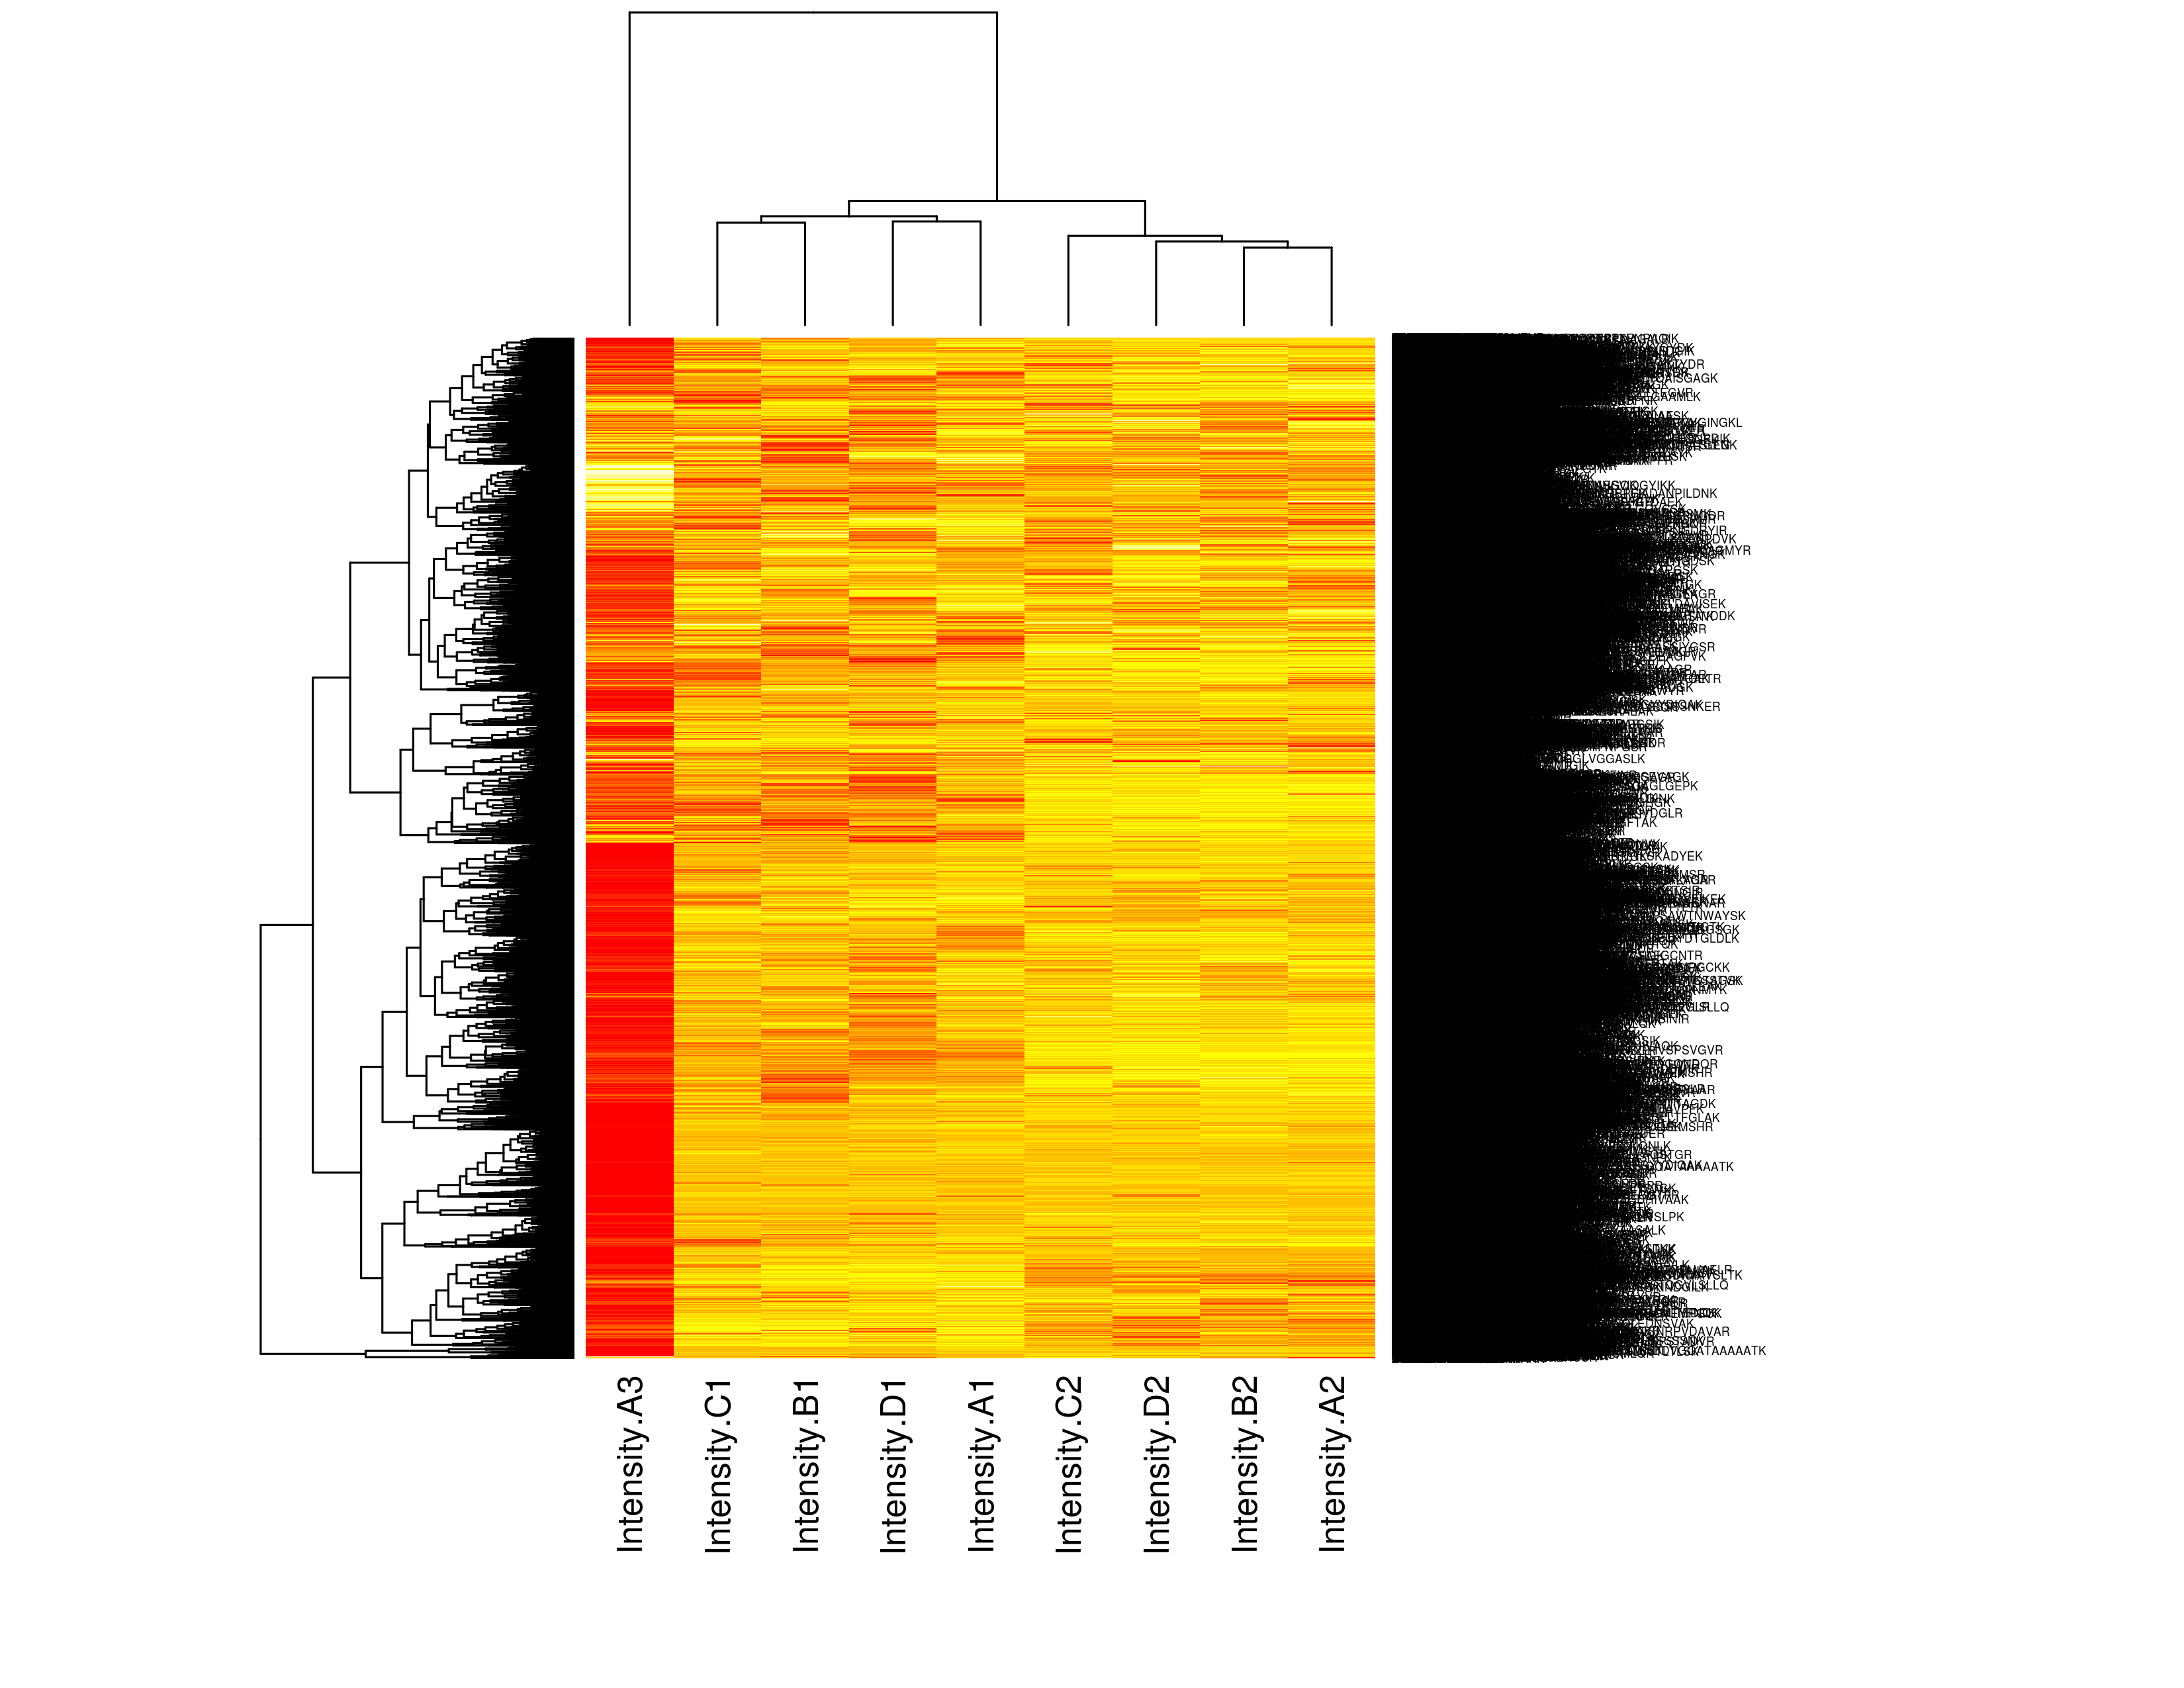

In [5]:
Image(stool_analysis_folder +'/diff/peptide_normalization/msnbase/all_data_heatmap_normalized.png')

### Alpha diversity analysis

In [6]:
ls           /home/thys/bio/export_stool3/txt/analysis_gregg/unipept

pept2lca_family_sc.csv  pept2lca_phylum_sc.csv   pept2lca.txt
pept2lca_genus_sc.csv   pept2lca_species_sc.csv  unipept.log
pept2lca_peptides.csv   pept2lca_taxon_sc.csv    unipept.sh*


In [32]:
taxon = pd.read_csv(stool_analysis_folder +'/unipept/pept2lca_species_sc.csv')
# http://scikit-bio.org/docs/0.1.3/generated/skbio.math.diversity.alpha.ace.html#skbio.math.diversity.alpha.ace
first = []
second = []
third = []
for col in taxon.columns:
    if col.startswith('Experiment.'):
        if col.endswith('1'):
            first.append(col)
        elif col.endswith('2'):
            second.append(col)
        elif col.endswith('3'):
            third.append(col)
#print(first, second, third)
a1 = skbio.diversity.alpha.ace(taxon[first].median(axis=1).apply(int).tolist())
a2 = skbio.diversity.alpha.ace(taxon[second].median(axis=1).apply(int).tolist())
a3 = skbio.diversity.alpha.ace(taxon[third].median(axis=1).apply(int).tolist())

print('ACE 1:', a1)
print('ACE 2:', a2)
print('ACE 3:', a3)

ACE 1: 203.531115519
ACE 2: 240.605913505
ACE 3: 157.071063741


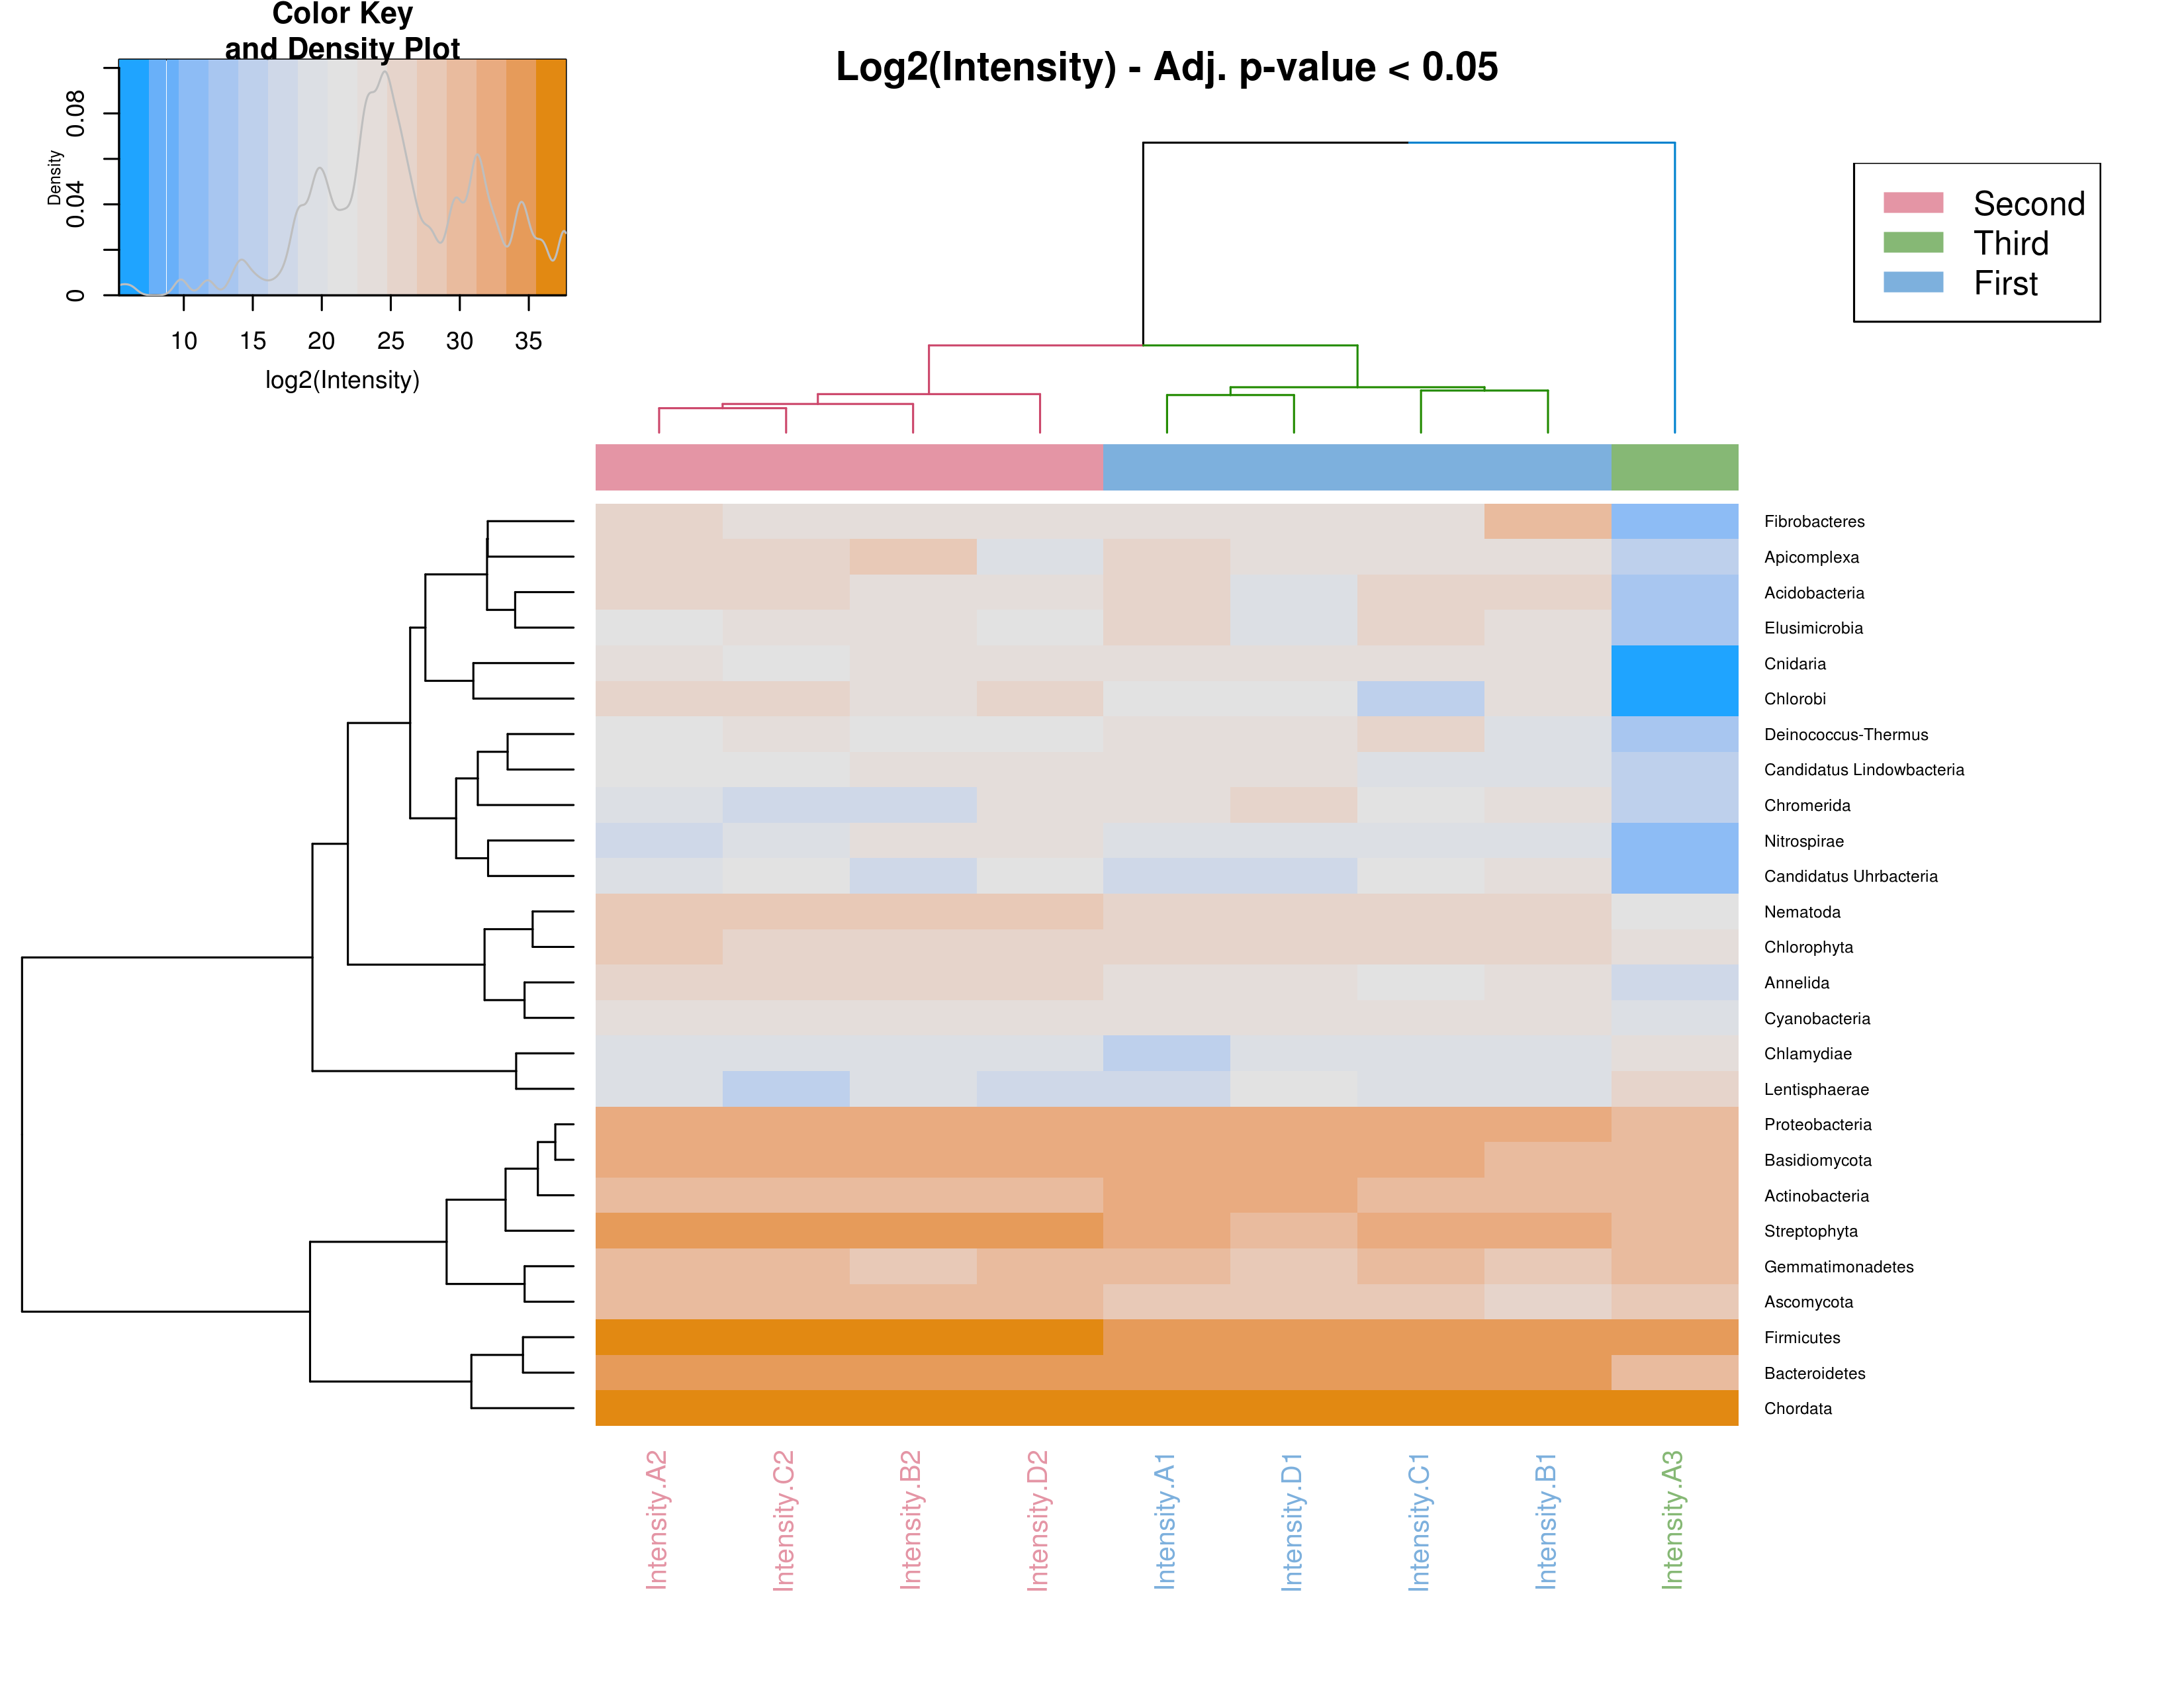

In [31]:
Image(stool_analysis_folder +'/diff/TIMEPOINTS/pept2lca_phylum/heatmaps/heatmap_significant.jpeg')

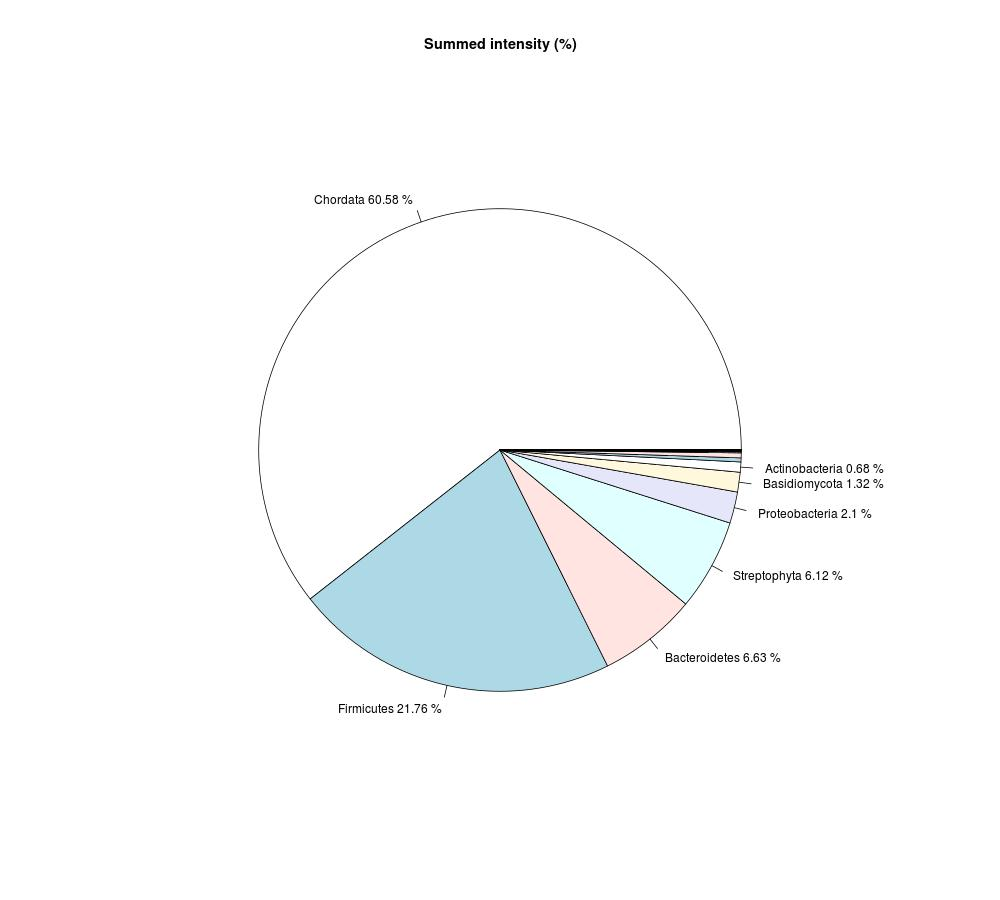

In [58]:
Image(stool_analysis_folder +'/diff/TIMEPOINTS/pept2lca_phylum/summed_intensity_Second.jpeg')

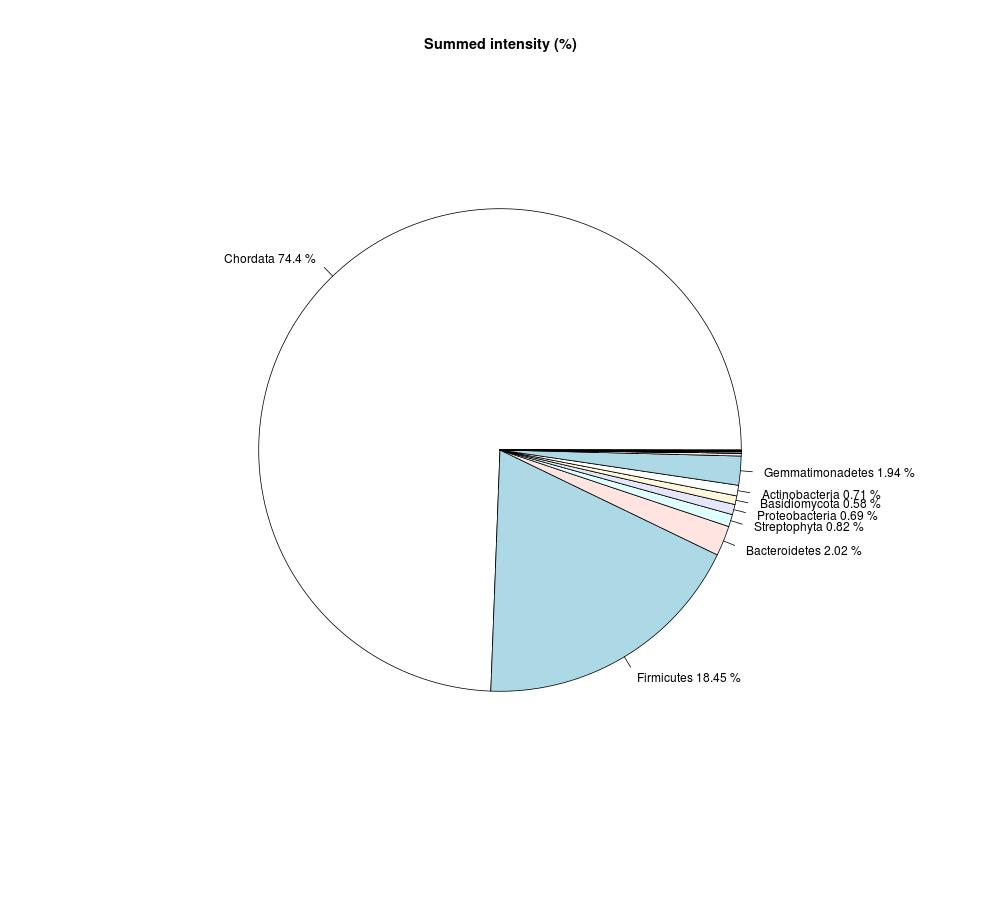

In [63]:
Image(stool_analysis_folder +'/diff/TIMEPOINTS/pept2lca_phylum/summed_intensity_Third.jpeg')

## 3.3 Differential abundance analysis

### 3.3.1 Peptides

### 3.3.2 Proteins

### 3.3.3 Taxon

### 3.3.4 Phylum

## 3.4 Gene set enrichment